In [1]:
!pip install nltk

In [ ]:
# Imports
import pandas as pd
import numpy as np
import re
from pathlib import Path

# Graphs
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

# NLP
import nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize  # Ensure this import is present
from nltk.stem import WordNetLemmatizer
import string
from collections import Counter

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Pandas settings
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

[nltk_data] Downloading package punkt to /home/blackbird/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/blackbird/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/blackbird/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/blackbird/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


---

In [3]:
DATA_DIR = Path("data")
sp_path = DATA_DIR / "south_park_all_seasons.csv"
slurs_path = DATA_DIR / "english_slurs.csv"

df = pd.read_csv(sp_path)
slurs_df = pd.read_csv(slurs_path)

In [4]:
slurs_df.sample(10)

,insult
1884,fuckhead
280,cock droplets
1791,twit
775,ja!lbait
1767,felch
766,hoes
807,jiggabooboo
1609,p*sshead
491,dumb@ss
84,assfuckerz


In [5]:
df['Line'] = df['Line'].str.rstrip('\n') # Remove \n

df.head()

,Season,Episode,Character,Line
0,10,1,Stan,"You guys, you guys! Chef is going away."
1,10,1,Kyle,Going away? For how long?
2,10,1,Stan,Forever.
3,10,1,Chef,I'm sorry boys.
4,10,1,Stan,"Chef said he's been bored, so he joining a group called the Super Adventure Club."


---

/tmp/ipykernel_27543/2312287967.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


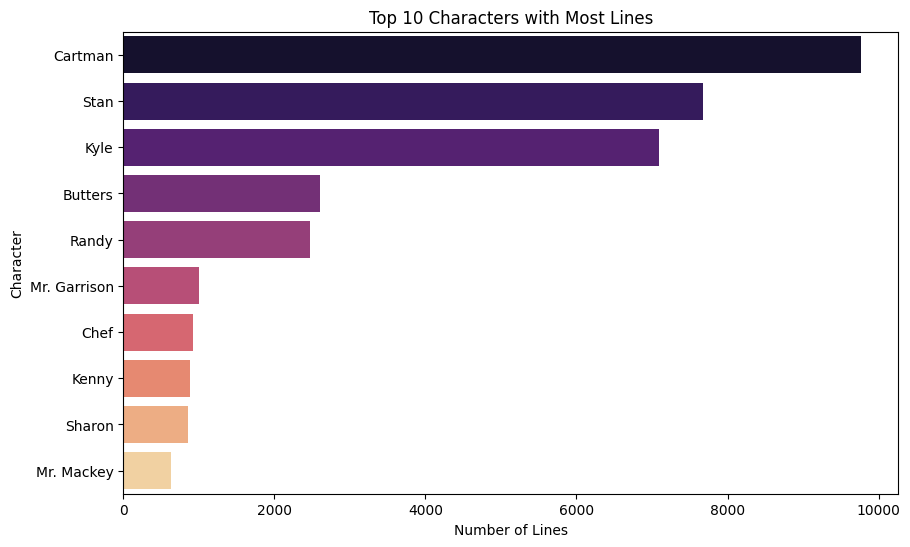

In [ ]:
# Group by 'Character'
lines_per_character = df.groupby('Character')['Line'].count().reset_index(name='lines')

top_characters = lines_per_character.nlargest(10, 'lines')

plt.figure(figsize=(10, 6))
sns.barplot(
    x='lines', 
    y='Character', 
    data=top_characters, 
    palette='magma',
)

plt.title('Top 10 Characters with Most Lines')
plt.xlabel('Number of Lines')
plt.ylabel('Character')

plt.show()

---

In [ ]:
# Lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Clean text
def tokenize_and_clean(text):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t not in stop_words and t not in string.punctuation]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return tokens

# Clean text without lemmatization
def tokenize_without_lemmatization(text):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t not in stop_words and t not in string.punctuation]
    return tokens

df['tokens_no_lemmatize'] = df['Line'].apply(tokenize_without_lemmatization)
df['tokens'] = df['Line'].apply(tokenize_and_clean)

,Character,Line,tokens,tokens_no_lemmatize
0,Stan,"You guys, you guys! Chef is going away.","[guy, guy, chef, going, away]","[guys, guys, chef, going, away]"
1,Kyle,Going away? For how long?,"[going, away, long]","[going, away, long]"
2,Stan,Forever.,[forever],[forever]
3,Chef,I'm sorry boys.,"['m, sorry, boy]","['m, sorry, boys]"
4,Stan,"Chef said he's been bored, so he joining a group called the Super Adventure Club.","[chef, said, 's, bored, joining, group, called, super, adventure, club]","[chef, said, 's, bored, joining, group, called, super, adventure, club]"


In [10]:
df[['Character', 'Line', 'tokens', 'tokens_no_lemmatize']].sample(10)

,Character,Line,tokens,tokens_no_lemmatize
63371,Stephen,O-hoo no Butters! You got an advance two days ago.,"[o-hoo, butter, got, advance, two, day, ago]","[o-hoo, butters, got, advance, two, days, ago]"
60391,Stephen,"Just wait till we get you home, you little fibber!","[wait, till, get, home, little, fibber]","[wait, till, get, home, little, fibber]"
19820,Mysterion,"Sometimes, people do stupid things. Sometimes they don't realize what should have come first. Until it's too late.","[sometimes, people, stupid, thing, sometimes, n't, realize, come, first, 's, late]","[sometimes, people, stupid, things, sometimes, n't, realize, come, first, 's, late]"
65152,Kyle,"Yeah. Yeah, that counts.","[yeah, yeah, count]","[yeah, yeah, counts]"
25340,Stan,I do?,[],[]
49170,Chef,"Well, no, uh of course Kenny is not a prostitute.","[well, uh, course, kenny, prostitute]","[well, uh, course, kenny, prostitute]"
46774,Man 4,"Well, I think the flag is racist! Huh, but then again, it is part of our history.","[well, think, flag, racist, huh, part, history]","[well, think, flag, racist, huh, part, history]"
56076,Butters,"Well, but ah I can get better.","[well, ah, get, better]","[well, ah, get, better]"
25039,Cartman,"Well why don't you just tell the whole world everything, huh?! Why don't you tell everyone what Prometheus was about while you're at it?!","[well, n't, tell, whole, world, everything, huh, n't, tell, everyone, prometheus, 're]","[well, n't, tell, whole, world, everything, huh, n't, tell, everyone, prometheus, 're]"
12872,Lead Biker,"'Course he's wrong! And anyway, nobody except that little freak would ever say something like it to our faces!","['course, 's, wrong, anyway, nobody, except, little, freak, would, ever, say, something, like, face]","['course, 's, wrong, anyway, nobody, except, little, freak, would, ever, say, something, like, faces]"


/tmp/ipykernel_27543/4065679238.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




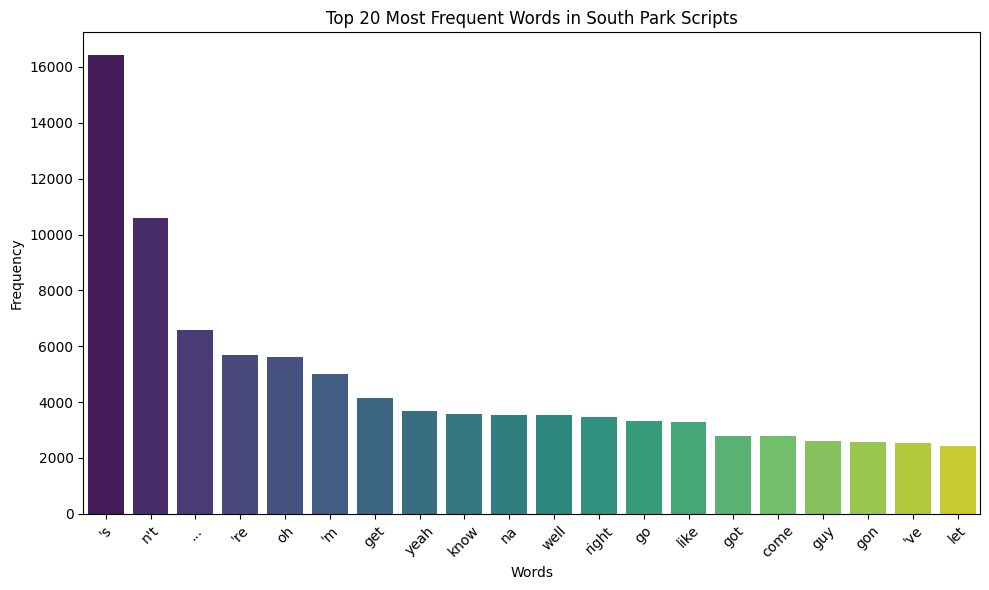

In [ ]:
all_tokens = [token for sublist in df['tokens'] for token in sublist]

token_freq = Counter(all_tokens)

top_20_tokens = token_freq.most_common(20)

words, counts = zip(*top_20_tokens)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(words), y=list(counts), palette='viridis')

plt.title('Top 20 Most Frequent Words in South Park Scripts')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [14]:
# Filter Cartman's dialogues
cartman_lines = df[df['Character'] == 'Cartman']
cartman_lines.sample(10)

,Season,Episode,Character,Line,tokens_no_lemmatize,tokens
38061,2,17,Cartman,"Oh, I get it.","[oh, get]","[oh, get]"
53926,5,13,Cartman,Fine! I don't need you assholes! I can sell these fetuses all on my own!,"[fine, n't, need, assholes, sell, fetuses]","[fine, n't, need, asshole, sell, fetus]"
61663,7,8,Cartman,"We have no choice, you guys. We're just gonna have to kill Kyle.","[choice, guys, 're, gon, na, kill, kyle]","[choice, guy, 're, gon, na, kill, kyle]"
70043,9,11,Cartman,We're fine!,"['re, fine]","['re, fine]"
56989,6,9,Cartman,"Alriiight! Get it, Tweek!","[alriiight, get, tweek]","[alriiight, get, tweek]"
4786,11,6,Cartman,"Okay, gracias.","[okay, gracias]","[okay, gracias]"
18419,15,8,Cartman,"What are you talking about?? I got vaccinated from the school, and now clearly I have Assburgers!","[talking, got, vaccinated, school, clearly, assburgers]","[talking, got, vaccinated, school, clearly, assburgers]"
47649,4,10,Cartman,Yeah.,[yeah],[yeah]
26116,18,2,Cartman,KYYYLE!,[kyyyle],[kyyyle]
23040,16,14,Cartman,Haha.,[haha],[haha]


In [20]:
insults_list = slurs_df['insult'].str.lower().tolist()

# Count insults in a given list of tokens
def count_insults(tokens, insults_list):
    return [word for word in tokens if word in insults_list]

# Count insults for each of Cartman's lines
cartman_lines.loc[:, 'Insults'] = cartman_lines['tokens'].apply(lambda x: count_insults(x, insults_list))

# Display
cartman_lines[['Character', 'Line', 'Insults']].sample(20)

/tmp/ipykernel_27543/1893348114.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Character,Line,Insults
23137,Cartman,No! What Alec Baldwin commercial?,[]
28744,Cartman,They don't think Scuzzlebutt is scary huh? Let's see how they like it when they actually see Scuzzlebutt! I'll scare the hell out of them tomorrow!,[hell]
44741,Cartman,Do not open your eyes until morning. Or else I will kick you in the nuts. Square in the nuts.,[]
43674,Cartman,"Time to go, Mr. Hankey.",[]
28423,Cartman,Beefcake!,[]
43989,Cartman,That was pretty cool.,[]
9933,Cartman,No way dude.,[]
19467,Cartman,HAAAAGH!,[]
21751,Cartman,"Dude, how come when we play baseball I have to be the catcher?",[]
5807,Cartman,"Hello, Mr. Broflovski, Ike. Nice evening, isn't it? Well Kyle, shall we go up to your room for a few minutes.",[]


/tmp/ipykernel_27543/821982065.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




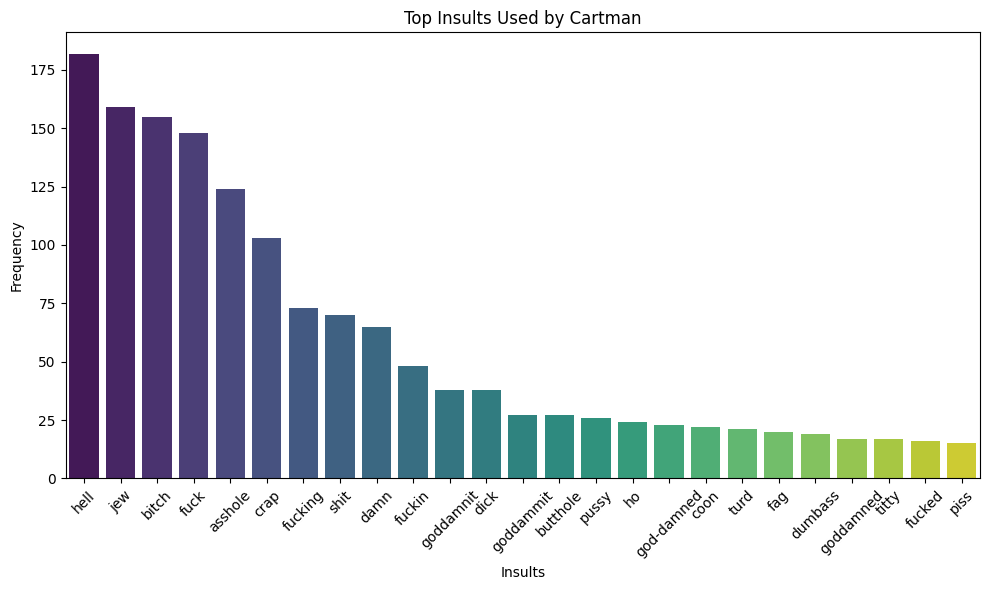

In [ ]:
# Flatten list of insults from Cartman's lines
all_insults = [insult for sublist in cartman_lines['insults'] for insult in sublist]

insult_freq = Counter(all_insults)

top_insults = insult_freq.most_common(25)

insults, counts = zip(*top_insults)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(insults), y=list(counts), palette='viridis')

plt.title("Top Insults Used by Cartman")
plt.xlabel('Insults')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()